## Imports

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics

## Dataset

In [107]:
df = pd.read_csv("D:/Codes/Predictive Analysis/Module 3/restaurant-revenue-prediction/train.csv")

df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [108]:
# df['Open Date']= pd.to_datetime(df['Open Date'])

for i in range(len(df.index)):
  df['Open Date'][i]=int(df['Open Date'][i][6:])

C:\Users\Msc 2\AppData\Local\Temp\ipykernel_8520\1974597050.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open Date'][i]=int(df['Open Date'][i][6:])


In [109]:
df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [110]:
from sklearn.preprocessing import LabelEncoder

label_encoder= LabelEncoder()

df['Type']=label_encoder.fit_transform(df['Type'])
df['City Group']=label_encoder.fit_transform(df['City Group'])
df['City']=label_encoder.fit_transform(df['City'])

In [111]:
df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999,31,0,2,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,2008,3,0,1,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,2013,10,1,2,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,2012,28,1,2,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,2009,14,1,2,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,2008,29,1,1,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,2006,32,0,1,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,2006,18,1,1,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,2010,31,0,1,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [112]:
norm_columns= list(df.columns)[5:-1]

In [113]:
from sklearn.preprocessing import StandardScaler

df[norm_columns] = StandardScaler().fit_transform(df[norm_columns])

In [114]:
df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999,31,0,2,-0.005034,0.391716,-0.308701,-0.367578,-0.006056,...,-0.080631,0.411513,0.302463,0.282950,2.281657,0.487922,0.575634,0.189821,1.615951,5653753.0
1,1,2008,3,0,1,-0.005034,0.391716,-0.308701,-0.367578,-0.835796,...,-0.080631,-0.494874,-0.554863,-0.484658,-0.672851,-0.483667,-0.592690,-0.532553,-0.625925,6923131.0
2,2,2013,10,1,2,-0.694749,-0.270816,-2.253162,0.619837,-0.006056,...,-0.080631,-0.494874,-0.554863,-0.484658,-0.672851,-0.483667,-0.592690,-0.532553,-0.625925,2055379.0
3,3,2012,28,1,2,0.684680,0.060450,1.635760,1.607252,1.653422,...,2.606351,4.037064,2.874441,1.434362,2.872558,3.014054,2.912282,2.356945,2.736889,2675511.0
4,4,2009,14,1,2,-0.349892,-0.270816,-1.280931,-0.367578,-0.006056,...,-0.080631,0.411513,-0.269088,0.091048,0.508952,0.099286,0.575634,0.189821,1.055482,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,2008,29,1,1,-0.694749,-0.933348,-1.280931,0.619837,1.653422,...,-0.080631,-0.494874,-0.554863,-0.484658,-0.672851,-0.483667,-0.592690,-0.532553,-0.625925,5787594.0
133,133,2006,32,0,1,-0.005034,0.391716,-0.308701,-0.367578,-0.006056,...,-0.080631,-0.494874,-0.554863,-0.484658,-0.672851,-0.483667,-0.592690,-0.532553,-0.625925,9262754.0
134,134,2006,18,1,1,-0.349892,-0.270816,-0.308701,-0.367578,-0.006056,...,-0.080631,-0.494874,-0.554863,-0.484658,-0.672851,-0.483667,-0.592690,-0.532553,-0.625925,2544857.0
135,135,2010,31,0,1,-0.005034,0.391716,-0.308701,0.619837,-0.006056,...,-0.080631,-0.494874,-0.554863,-0.484658,-0.672851,-0.483667,-0.592690,-0.532553,-0.625925,7217634.0


## Implementing all the models

In [115]:
def get_metrics(y_test, y_pred):

  print(f"Mean Absoulute error      : {metrics.mean_absolute_error(y_test,y_pred)}")
  print(f"Mean Squared error        : {metrics.mean_squared_error(y_test,y_pred)}")
  print(f"Root Mean Square error    : {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")
  print(f"R2 score                  : {metrics.r2_score(y_test,y_pred)}")

In [116]:
X = df.drop('revenue', axis= 1)
y = df['revenue']

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 9)

#### Linear Regression

In [118]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [119]:
y_pred = regressor.predict(X_test)

In [120]:
get_metrics(y_test, y_pred)

Mean Absoulute error      : 2713941.1332346746
Mean Squared error        : 15685755350437.613
Root Mean Square error    : 3960524.6307071005
R2 score                  : -2.089744681005677


#### Polynomial Regression

In [121]:
from sklearn.preprocessing import PolynomialFeatures

# Fit polynomial regression model
poly = PolynomialFeatures(degree=1) # set degree of polynomial
X_poly_train = poly.fit_transform(X_train) # create polynomial features
poly_reg = LinearRegression() # create linear regression model
poly_reg.fit(X_poly_train, y_train) # fit model on polynomial features

X_poly_test= poly.fit_transform(X_test)
# Make predictions
y_pred = poly_reg.predict(X_poly_test)

In [122]:
get_metrics(y_test, y_pred)

Mean Absoulute error      : 4241519.9130434785
Mean Squared error        : 30627243482369.22
Root Mean Square error    : 5534188.601987578
R2 score                  : -5.032885285366636


#### Decision Tree Regressor

In [123]:
from sklearn.tree import DecisionTreeRegressor


# Create decision tree regression model
model = DecisionTreeRegressor(max_depth=5) # Set max_depth to avoid overfitting
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

In [124]:
get_metrics(y_test, y_pred)

Mean Absoulute error      : 2537965.244824016
Mean Squared error        : 21952229221040.438
Root Mean Square error    : 4685320.610272091
R2 score                  : -3.324100558538598


#### Random Forest Regressor

In [125]:
from sklearn.ensemble import RandomForestRegressor

# Training the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Predicting the target values
y_pred = rf_model.predict(X_test)

In [126]:
get_metrics(y_test, y_pred)

Mean Absoulute error      : 1732707.4671739133
Mean Squared error        : 6803487897360.607
Root Mean Square error    : 2608349.650135236
R2 score                  : -0.34013568830588525


### Feature Selection

In [127]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

Feature 0: 0.239479
Feature 1: 15.178665
Feature 2: 9.266375
Feature 3: 7.681256
Feature 4: 0.617415
Feature 5: 0.311696
Feature 6: 4.265817
Feature 7: 0.073803
Feature 8: 0.347047
Feature 9: 0.095504
Feature 10: 1.870202
Feature 11: 0.476541
Feature 12: 0.403217
Feature 13: 0.095061
Feature 14: 0.324494
Feature 15: 1.252227
Feature 16: 0.091213
Feature 17: 0.927239
Feature 18: 0.011355
Feature 19: 0.000188
Feature 20: 0.164627
Feature 21: 0.180166
Feature 22: 0.099197
Feature 23: 0.200423
Feature 24: 0.002035
Feature 25: 0.753356
Feature 26: 0.250491
Feature 27: 0.118018
Feature 28: 0.040064
Feature 29: 0.041628
Feature 30: 0.004020
Feature 31: 0.004598
Feature 32: 1.879482
Feature 33: 0.636196
Feature 34: 0.309795
Feature 35: 0.076215
Feature 36: 0.475386
Feature 37: 0.025297
Feature 38: 0.493671
Feature 39: 0.236725
Feature 40: 0.356928
Feature 41: 0.003515


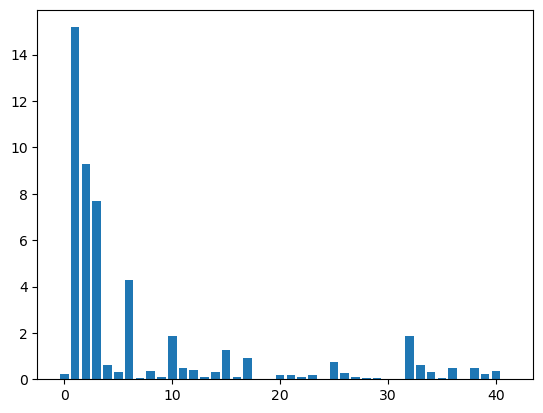

In [128]:
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [129]:
index1 = []
for i in range(0,len(fs.scores_)):
  if(fs.scores_[i]>=2):
    index1.append(i+1)
index1.append(len(df.columns)-1)   # we are including the normlaized target column also 
index1

[2, 3, 4, 7, 42]

In [130]:
fit_df= df.iloc[:, index1]

fit_df

,City,City Group,Type,P3,revenue
0,31,0,2,-0.308701,5653753.0
1,3,0,1,-0.308701,6923131.0
2,10,1,2,-2.253162,2055379.0
3,28,1,2,1.635760,2675511.0
4,14,1,2,-1.280931,4316715.0
...,...,...,...,...,...
132,29,1,1,-1.280931,5787594.0
133,32,0,1,-0.308701,9262754.0
134,18,1,1,-0.308701,2544857.0
135,31,0,1,-0.308701,7217634.0


In [131]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset

# Splitting the data into training and testing sets
X = fit_df.iloc[:, 0:-1].values
y = fit_df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=9)

# Training the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Predicting the target values
y_pred = rf_model.predict(X_test)

In [132]:
get_metrics(y_test, y_pred)

Mean Absoulute error      : 1746327.268006144
Mean Squared error        : 6028102375529.864
Root Mean Square error    : 2455219.414946425
R2 score                  : -0.18740199851653672
